In [3]:
# !pip install pandas
# !pip install seaborn
# !pip install numpy
# !pip install matplotlib
# !pip install scikit-learn

  Using cached scikit_learn-1.5.2-cp310-cp310-win_amd64.whl.metadata (13 kB)
  Using cached scipy-1.14.1-cp310-cp310-win_amd64.whl.metadata (60 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.5.2-cp310-cp310-win_amd64.whl (11.0 MB)
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
Using cached scipy-1.14.1-cp310-cp310-win_amd64.whl (44.8 MB)
Using cached threadpoolctl-3.5.0-py3-none-any.whl (18 kB)


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
cancer= pd.DataFrame(load_breast_cancer().data,columns = load_breast_cancer().feature_names)

In [5]:
cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [6]:
# Verificar si hay valores nulos en el DataFrame
null_counts = cancer.isnull().sum()

# Mostrar las columnas que tienen valores nulos
print("Conteo de valores nulos por columna:")
print(null_counts[null_counts > 0])

Conteo de valores nulos por columna:
Series([], dtype: int64)


In [57]:
print(null_counts) #no hay nulos

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64


In [4]:
cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [8]:
cancer_data = load_breast_cancer()
# Convertir a DataFrame (incluir tanto los datos como las etiquetas)
df_cancer = pd.DataFrame(cancer_data.data, columns=cancer_data.feature_names)

# Añadir la columna de la etiqueta (maligno o benigno) al DataFrame
df_cancer['target'] = cancer_data.target

# Ver las primeras filas del DataFrame
print(df_cancer.head())

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

In [12]:
print(cancer_data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Cargar el dataset de breast cancer
cancer_data = load_breast_cancer()

# Convertir a DataFrame (incluir tanto los datos como las etiquetas)
df_cancer = pd.DataFrame(cancer_data.data, columns=cancer_data.feature_names)

# Añadir la columna de la etiqueta (maligno o benigno) al DataFrame
df_cancer['target'] = cancer_data.target

# Dividir las características (X) y la etiqueta (y)
X = df_cancer.drop('target', axis=1)
y = df_cancer['target']

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# REGRESIÓN LOGÍSTICA

In [15]:
# Entrenar un modelo de regresión logística
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

# Hacer predicciones
y_pred = model.predict(X_test)


X: Contiene las características (todas las columnas excepto 'target').

y: Contiene la etiqueta (columna 'target').

Luego, se dividen los datos en conjuntos de entrenamiento y prueba, y se entrena un modelo de Regresión Logística.

In [16]:
# Calcular la precisión (accuracy) y el recall
accuracy_cancer = accuracy_score(y_test, y_pred)
recall_cancer = recall_score(y_test, y_pred)

print(f"Exactitud del modelo (RL): {accuracy_cancer:.4f}")
print(f"Recall del modelo (RL): {recall_cancer:.4f}")

Exactitud del modelo (RL): 0.9693
Recall del modelo (RL): 0.9730


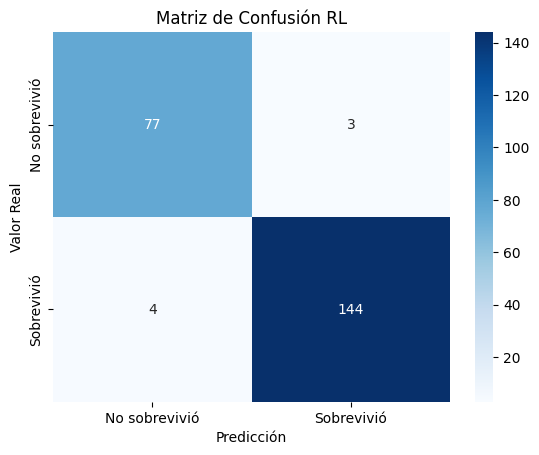

In [17]:
# Calcular la matriz de confusión
conf_matrix_cancer = confusion_matrix(y_test, y_pred)

# Graficar la matriz de confusión
sns.heatmap(conf_matrix_cancer, annot=True, fmt='d', cmap='Blues', xticklabels=['No sobrevivió', 'Sobrevivió'], yticklabels=['No sobrevivió', 'Sobrevivió'])
plt.ylabel('Valor Real')
plt.xlabel('Predicción')
plt.title('Matriz de Confusión RL')
plt.show()

#K-Means

In [12]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
# Cargar el dataset de breast cancer
#cancer_data = load_breast_cancer()
#df = pd.DataFrame(cancer_data.data, columns=cancer_data.feature_names)
#df['target'] = cancer_data.target

# Dividir las características (X) y la etiqueta (y)
X2 = df_cancer.drop('target', axis=1)
y2 = df_cancer['target']

# Escalar las características (importante para K-means)
scaler2 = StandardScaler()
X2_scaled2 = scaler2.fit_transform(X)

# Aplicar K-means
kmeans = KMeans(n_clusters=2, random_state=42) #2 cluster (benigno o no maligno)
y2_kmeans = kmeans.fit_predict(X2_scaled2)




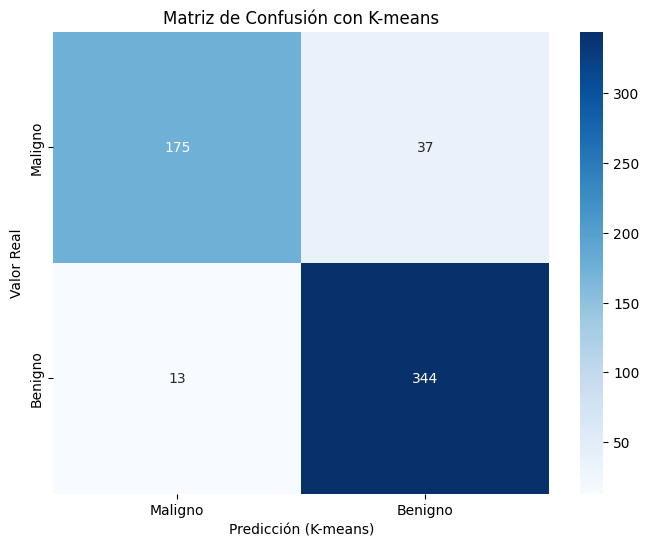

In [15]:
# Calcular la matriz de confusión
conf_matrix_cancer_km = confusion_matrix(y2, y2_kmeans)

# Graficar la matriz de confusión
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix_cancer_km, annot=True, fmt='d', cmap='Blues', xticklabels=['Maligno', 'Benigno'], yticklabels=['Maligno', 'Benigno'])
plt.ylabel('Valor Real')
plt.xlabel('Predicción (K-means)')
plt.title('Matriz de Confusión con K-means')
plt.show()


In [17]:

# Calcular la precisión (accuracy) y el recall
accuracy_km = accuracy_score(y2, y2_kmeans)
recall_km = recall_score(y2, y2_kmeans)

print(f"Exactitud del modelo (K-means): {accuracy_km:.4f}")
print(f"Recall del modelo (K-means): {recall_km:.4f}")

Exactitud del modelo (K-means): 0.9121
Recall del modelo (K-means): 0.9636


#PCA Análisis de Componentes Principales

In [18]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
# Cargar el dataset de breast cancer
#cancer_data = load_breast_cancer()
#df = pd.DataFrame(cancer_data.data, columns=cancer_data.feature_names)

# Escalar las características
scaler3 = StandardScaler()
X3_scaled3 = scaler3.fit_transform(df_cancer)

# Aplicar PCA
pca = PCA(n_components=2)  # Reducir a 2 dimensiones para visualización
X3_pca = pca.fit_transform(X3_scaled3)

# Crear un DataFrame para las componentes principales
df_pca = pd.DataFrame(data=X3_pca, columns=['Componente Principal 1', 'Componente Principal 2'])
df_pca['target'] = df_cancer['target']



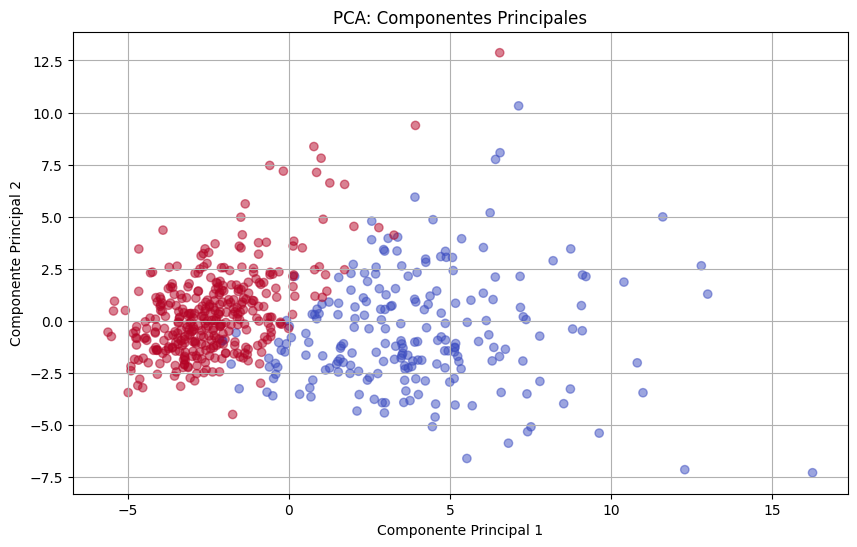

In [20]:
# Graficar las dos primeras componentes principales
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df_pca['Componente Principal 1'], df_pca['Componente Principal 2'],
                      c=df_pca['target'], cmap='coolwarm', alpha=0.5)
plt.title('PCA: Componentes Principales')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.grid()
plt.show()


In [21]:

# Explicar la varianza de cada componente
explained_variance = pca.explained_variance_ratio_
print(f"Varianza explicada por la Componente Principal 1: {explained_variance[0]:.4f}")
print(f"Varianza explicada por la Componente Principal 2: {explained_variance[1]:.4f}")

Varianza explicada por la Componente Principal 1: 0.4490
Varianza explicada por la Componente Principal 2: 0.1847


# Naive Bayes

In [18]:
# Entrenar un modelo de Naive Bayes
model = GaussianNB()
model.fit(X_train, y_train)

# Hacer predicciones
y_pred = model.predict(X_test)

# Calcular la precisión (accuracy) y el recall
accuracy_cancer_nb = accuracy_score(y_test, y_pred)
recall_cancer_nb = recall_score(y_test, y_pred)

print(f"Exactitud del modelo (Naive Bayes): {accuracy_cancer_nb:.4f}")
print(f"Recall del modelo (Naive Bayes): {recall_cancer_nb:.4f}")


Exactitud del modelo (Naive Bayes): 0.9518
Recall del modelo (Naive Bayes): 0.9730


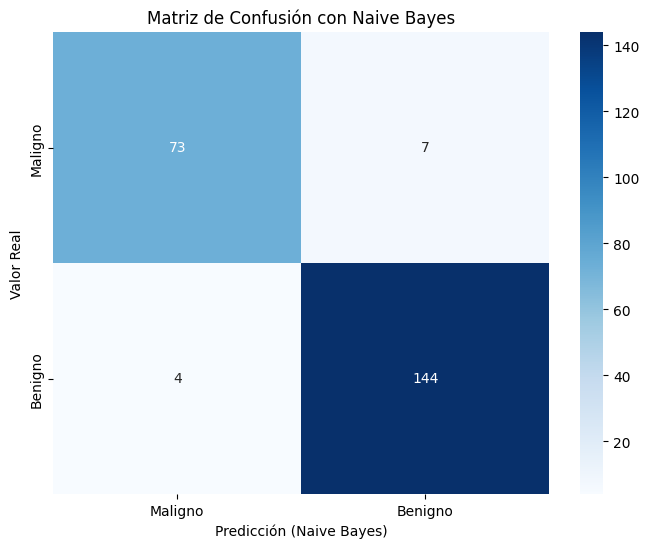

In [19]:
# Calcular la matriz de confusión
conf_matrix_cancer_nb = confusion_matrix(y_test, y_pred)

# Graficar la matriz de confusión
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix_cancer_nb, annot=True, fmt='d', cmap='Blues', xticklabels=['Maligno', 'Benigno'], yticklabels=['Maligno', 'Benigno'])
plt.ylabel('Valor Real')
plt.xlabel('Predicción (Naive Bayes)')
plt.title('Matriz de Confusión con Naive Bayes')
plt.show()

# Análisis de Discriminante

In [21]:
model = LinearDiscriminantAnalysis()
model.fit(X_train, y_train)

# Hacer predicciones
y_pred = model.predict(X_test)

# Calcular la precisión (accuracy) y el recall
accuracy_cancer_lda = accuracy_score(y_test, y_pred)
recall_cancer_lda = recall_score(y_test, y_pred)

print(f"Exactitud del modelo (LDA): {accuracy_cancer_lda:.4f}")
print(f"Recall del modelo (LDA): {recall_cancer_lda:.4f}")



Exactitud del modelo (LDA): 0.9605
Recall del modelo (LDA): 0.9865


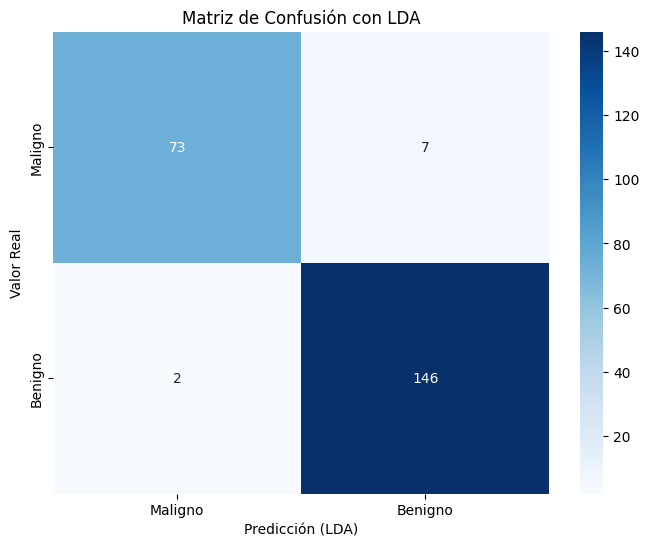

In [22]:
# Calcular la matriz de confusión
conf_matrix_cancer_lda = confusion_matrix(y_test, y_pred)

# Graficar la matriz de confusión
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix_cancer_lda, annot=True, fmt='d', cmap='Blues', xticklabels=['Maligno', 'Benigno'], yticklabels=['Maligno', 'Benigno'])
plt.ylabel('Valor Real')
plt.xlabel('Predicción (LDA)')
plt.title('Matriz de Confusión con LDA')
plt.show()